# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and import the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find out the dataset has 81 columns which are a lot. Due to the limited space in Jupyter Notebook, you are not able to see all the columns and their individual types. 

#### So next you will display a list of all the variables.  

*Bonus question: ideally, you should print the full list of the variables and what type each variable is.*

In [25]:
# your code here
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 

You care about missing values. If a column has too many missing values, it is not reliable to use this variable to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the rows where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [3]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df[missing_value_df['percent_missing']>20]

,column_name,percent_missing
Alley,Alley,93.767123
FireplaceQu,FireplaceQu,47.260274
PoolQC,PoolQC,99.520548
Fence,Fence,80.753425
MiscFeature,MiscFeature,96.301370


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have only 76 columns now.

In [4]:
# your code here
df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

df.shape

(1460, 76)

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph.

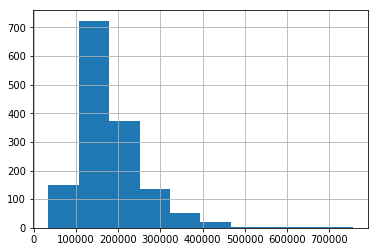

In [5]:
# your code here
df['SalePrice'].hist()

In [ ]:
# your comment here
# Data have near-normal distribution but it is skewed to the left

## Bonus Challenge

If you used the correct approach in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function.

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted data.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

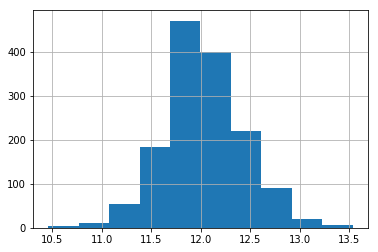

In [41]:
# your code here
df['SalePriceAdjusted'] = df['SalePrice'].apply(np.log)
df['SalePriceAdjusted'].hist()

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* Size of the house (`GrLivArea`, `LotArea`, and `GarageArea`).

* Number of rooms (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* How long the house has been built or remodeled (`YearBuilt` and `YearRemodAdd`).

* Neighborhood of the house (`Neighborhood`).

In this challenge, use the appropriate chart type to visualize the relationships between `SalePrice`/`SalePriceAdjusted` and the fields above. Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing the number of half bathrooms does not make sense. What makes sense is to visualize the total number of rooms. So you'll need to create a column called `TotalRooms` which is the sum of all types of rooms.
    * `YearBuilt` and `YearRemodAdd` are year numbers not length. So you need to create two new columns for how long the house has been built or remodeled.
* Make comments to explain your thinking process and you conclusion based on the visualizations.
* Highlight the stories you want to tell.

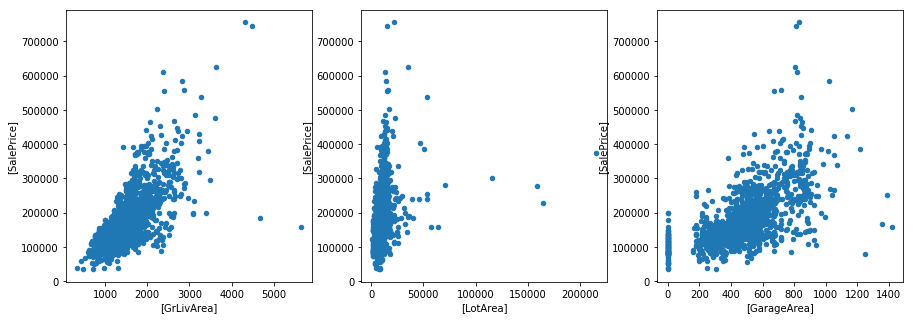

In [38]:
# your code here
fig, axes = plt.subplots(1, 3, figsize=(15,5))

df.plot(x=['GrLivArea'], y=["SalePrice"], kind="scatter", ax=axes[0])
df.plot(x=['LotArea'], y=["SalePrice"], kind="scatter", ax=axes[1])
df.plot(x=['GarageArea'], y=["SalePrice"], kind="scatter", ax=axes[2])

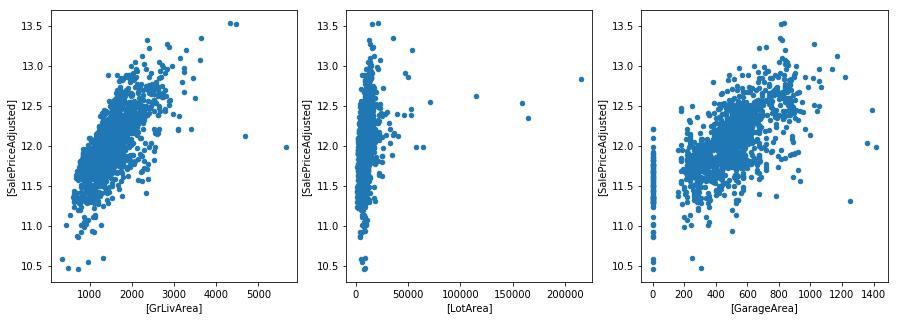

In [42]:
# your code here
fig, axes = plt.subplots(1, 3, figsize=(15,5))

df.plot(x=['GrLivArea'], y=["SalePriceAdjusted"], kind="scatter", ax=axes[0])
df.plot(x=['LotArea'], y=["SalePriceAdjusted"], kind="scatter", ax=axes[1])
df.plot(x=['GarageArea'], y=["SalePriceAdjusted"], kind="scatter", ax=axes[2])

In [21]:
df['TotalRooms'] = df['BedroomAbvGr'] + df['KitchenAbvGr'] + df['FullBath'] + df['HalfBath']*0.5 + df['BsmtFullBath'] + df['BsmtHalfBath']*0.5

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceAdjusted,TotalRooms
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2008,WD,Normal,208500,12.247694,7.5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,5,2007,WD,Normal,181500,12.109011,6.5
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,9,2008,WD,Normal,223500,12.317167,7.5
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,2,2006,WD,Abnorml,140000,11.849398,6.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,12,2008,WD,Normal,250000,12.429216,8.5


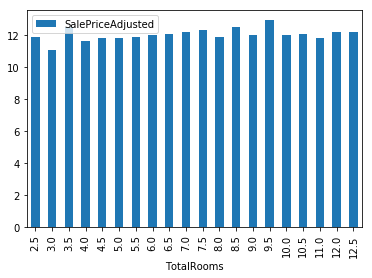

In [43]:
# your code here
# import seaborn as sns
# sns.lmplot(x='TotalRooms',y='SalePrice', data=df,fit_reg=True) 

room_price_mean = df[['SalePriceAdjusted',"TotalRooms"]].groupby(["TotalRooms"]).agg("median")
room_price_mean.plot.bar()

# df.plot.scatter(x="YearBuilt", y="SalePrice", alpha=0.2, grid=True)

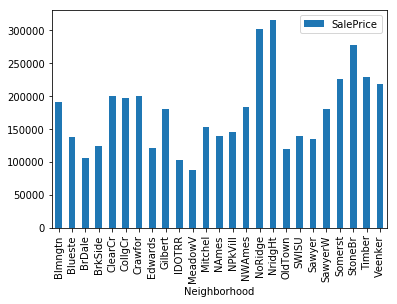

In [36]:
# your code here
# import seaborn as sns
# sns.lmplot(x='TotalRooms',y='SalePrice', data=df,fit_reg=True) 

room_price_mean = df[['SalePrice',"Neighborhood"]].groupby(["Neighborhood"]).agg("median")
room_price_mean.plot.bar()

# df.plot.scatter(x="YearBuilt", y="SalePrice", alpha=0.2, grid=True)

In [ ]:
import seaborn as sns

cmap = sns.cubehelix_palette(as_cmap=True)
df.plot.scatter(x="GrLivArea", y="SalePrice", c="YearBuilt", cmap=cmap, alpha=0.2, grid=True)

In [ ]:

df.plot.scatter(x="GrLivArea", y="SalePrice", c="YearRemodAdd", cmap=cmap, alpha=0.2, grid=True)
# df2 = df[['']]
# pd.plotting.scatter_matrix(df2, figsize=(20,10))

In [ ]:
df.plot.scatter(x="OverallQual", y="SalePrice", c="YearRemodAdd", cmap=cmap, alpha=0.2, grid=True)

In [ ]:
df['OverallQual'].unique()

In [ ]:
# price_mean = df["SalePrice"].groupby("OverallQual").agg("mean")
# price_mean.plot.barh()

df.plot.scatter(x="GrLivArea", y="SalePrice", c="OverallQual", cmap=cmap, alpha=0.2, grid=True)


In [ ]:
df_selected = df[['OverallQual','Foundation','FullBath','TotRmsAbvGrd','Fireplaces','LotShape','BedroomAbvGr','Neighborhood','KitchenAbvGr','MSZoning','SalePrice']].copy()

pd.plotting.scatter_matrix(df_selected, figsize=(20,20))


In [ ]:
df['Foundation'].unique()

In [ ]:
df['MSZoning'].unique()

In [ ]:
df['Neighborhood'].unique()